# note:
* [covariance matrix](http://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html)
* [multivariate_normal](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.multivariate_normal.html)
* [seaborn  bivariate kernel density estimate](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.kdeplot.html#seaborn.kdeplot)

In [129]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", style="white", palette=sns.color_palette("RdBu"))

import numpy as np
import pandas as pd
import scipy.io as sio
from scipy import stats

import sys
sys.path.append('..')

from helper import anomaly

In [130]:
mat = sio.loadmat('./data/ex8data1.mat')
mat.keys()

dict_keys(['__version__', '__globals__', 'yval', '__header__', 'X', 'Xval'])

In [131]:
X = mat.get('X')
print(X.shape)
X[:5]

(307, 2)


array([[ 13.04681517,  14.74115241],
       [ 13.40852019,  13.7632696 ],
       [ 14.19591481,  15.85318113],
       [ 14.91470077,  16.17425987],
       [ 13.57669961,  14.04284944]])

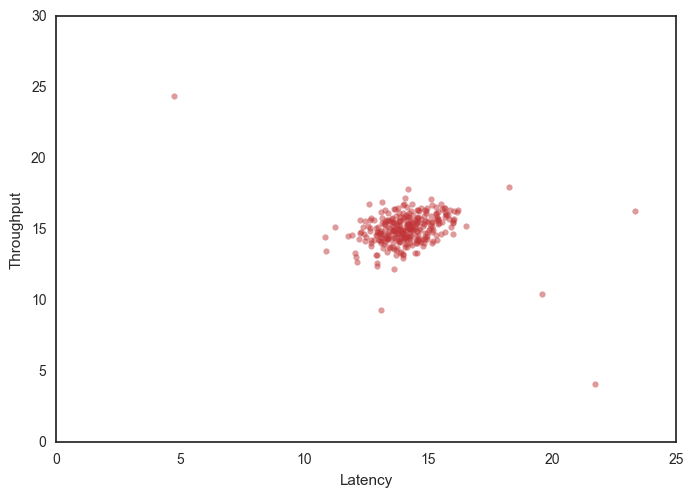

In [132]:
sns.regplot('Latency', 'Throughput',
           data=pd.DataFrame(X, columns=['Latency', 'Throughput']), 
           fit_reg=False,
           scatter_kws={"s":20,
                        "alpha":0.5})

# estimate Gaussian parameters $\mu$ and $\sigma^2$
> **Assumption**: variables are indepenent with each other

In [133]:
mu, sigma2 = anomaly.estimate_Gaussian(X)

print(mu)
print(sigma2)

[ 14.11222578  14.99771051]
[ 1.83263141  1.70974533]


# multivariate normal
> according to data, X1, and X2 is not independent

In [134]:
mu = X.mean(axis=0)
print(mu, '\n')

cov = np.cov(X.T)
print(cov)

[ 14.11222578  14.99771051] 

[[ 1.83862041 -0.22786456]
 [-0.22786456  1.71533273]]


In [149]:
# example of creating 2d grid to calculate probability density
np.dstack(np.mgrid[0:5,0:5])

array([[[0, 0],
        [0, 1],
        [0, 2],
        [0, 3],
        [0, 4]],

       [[1, 0],
        [1, 1],
        [1, 2],
        [1, 3],
        [1, 4]],

       [[2, 0],
        [2, 1],
        [2, 2],
        [2, 3],
        [2, 4]],

       [[3, 0],
        [3, 1],
        [3, 2],
        [3, 3],
        [3, 4]],

       [[4, 0],
        [4, 1],
        [4, 2],
        [4, 3],
        [4, 4]]])

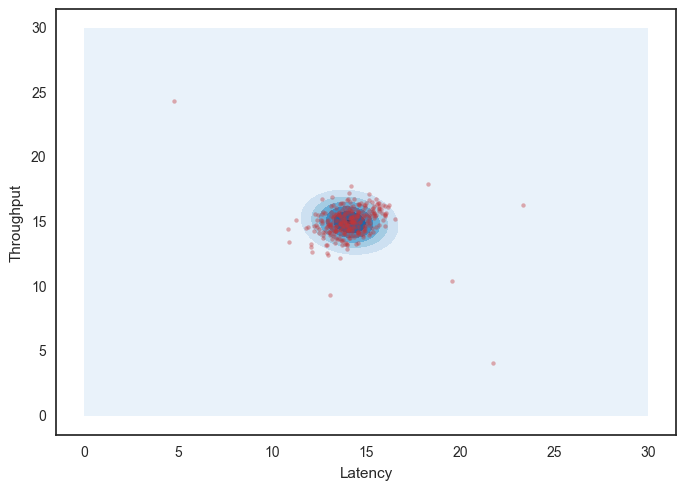

In [152]:
multi_normal = stats.multivariate_normal(mu, cov)

x, y = np.mgrid[0:30:0.01, 0:30:0.01]
pos = np.dstack((x, y))

fig, ax = plt.subplots()
ax.contourf(x, y, multi_normal.pdf(pos), cmap='Blues')

sns.regplot('Latency', 'Throughput',
           data=pd.DataFrame(X, columns=['Latency', 'Throughput']), 
           fit_reg=False,
           ax=ax,
           scatter_kws={"s":10,
                        "alpha":0.4})